In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("adult.csv")

# Checking the structure of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [33]:
print(data.isnull().sum())


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [34]:
# Summary statistics for numerical attributes
print(data.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


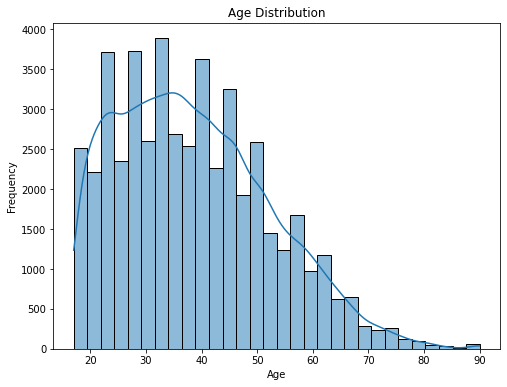

In [35]:
# Visualizations for key insights
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

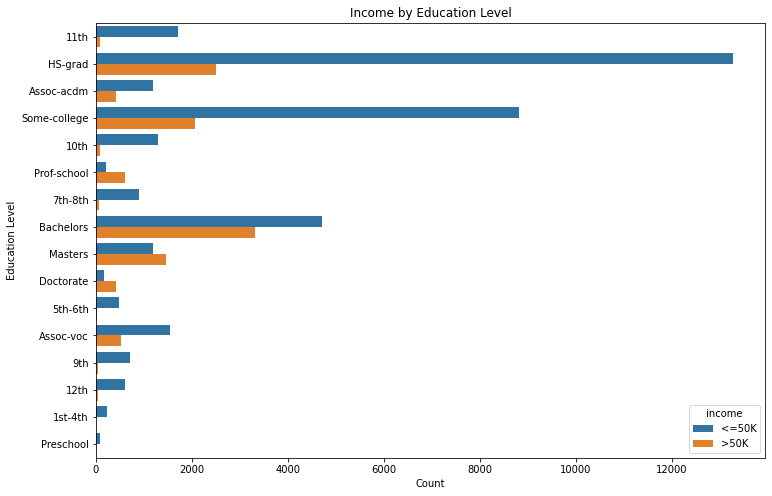

In [36]:
# Income by education
plt.figure(figsize=(12, 8))
sns.countplot(y='education', hue='income', data=data)
plt.title('Income by Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Define multiple classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Results dictionary
results = {}

# Loop through classifiers
for name, clf in classifiers.items():
    # Create a pipeline with the preprocessor and the classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Train the classifier
    pipeline.fit(X_train, y_train)
    
    # Predict the test set results
    y_pred = pipeline.predict(X_test)
    
    # Store results
    results[name] = {
        "Classification Report": classification_report(y_test, y_pred),
        "Accuracy Score": accuracy_score(y_test, y_pred)
    }

# Print results for each classifier
for name, result in results.items():
    print(f"Results for {name}:")
    print("Accuracy Score:", result["Accuracy Score"])
    print(result["Classification Report"])
    print("-------------------------------")


Results for Logistic Regression:
Accuracy Score: 0.8572013512130208
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7479
        >50K       0.74      0.61      0.67      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769

-------------------------------
Results for Support Vector Machine:
Accuracy Score: 0.8623195823523391
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7479
        >50K       0.77      0.60      0.67      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.77      0.79      9769
weighted avg       0.86      0.86      0.86      9769

-------------------------------
Results for Gradient Boosting:
Accuracy Score: 0.8739891493499846
              precision    recall  f1-score   support

       <=50K       0.8

In [42]:
input_data = {
    'age': [37],
    'workclass': ['Private'],
    'fnlwgt': [215646],
    'education': ['HS-grad'],
    'educational-num': [9],
    'marital-status': ['Divorced'],
    'occupation': ['Handlers-cleaners'],
    'relationship': ['Not-in-family'],
    'race': ['White'],
    'gender': ['Male'],
    'capital-gain': [0],
    'capital-loss': [0],
    'hours-per-week': [40],
    'native-country': ['United-States']
}


In [43]:
import pandas as pd

# Convert dictionary to DataFrame
input_df = pd.DataFrame(input_data)



In [44]:
# Assuming you have a preprocessing pipeline setup
processed_input = pipeline['preprocessor'].transform(input_df)



In [45]:
# Make predictions using the trained model within the pipeline
prediction = pipeline.predict(input_df)

# Output prediction result
if prediction[0] == 1:
    print("The model predicts: Income >= $50K")
else:
    print("The model predicts: Income < $50K")


The model predicts: Income < $50K
